In [1]:
pip install datasets pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00


In [1]:
from datasets import load_dataset
import pandas as pd

# Load the SQuAD dataset
squad_dataset = load_dataset("squad")

# Convert to pandas DataFrame
train_df = pd.DataFrame(squad_dataset['train'])
validation_df = pd.DataFrame(squad_dataset['validation'])

# Display basic information
print(train_df.info())
print(validation_df.info())

# Show the first few rows of the training set
print(train_df.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87599 entries, 0 to 87598
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        87599 non-null  object
 1   title     87599 non-null  object
 2   context   87599 non-null  object
 3   question  87599 non-null  object
 4   answers   87599 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10570 non-null  object
 1   title     10570 non-null  object
 2   context   10570 non-null  object
 3   question  10570 non-null  object
 4   answers   10570 non-null  object
dtypes: object(5)
memory usage: 413.0+ KB
None
                         id                     title  \
0  5733be284776f41900661182  University_of_Notre_Dame   
1  5733be284776f4190066117f  University_of_Not

In [2]:
# Length of context, question, and answer text
train_df['context_length'] = train_df['context'].apply(len)
train_df['question_length'] = train_df['question'].apply(len)
train_df['answer_length'] = train_df['answers'].apply(lambda x: len(x['text'][0]))

# Summary statistics for lengths
print(train_df[['context_length', 'question_length', 'answer_length']].describe())

       context_length  question_length  answer_length
count    87599.000000     87599.000000   87599.000000
mean       754.364216        59.571137      20.147273
std        307.396264        89.027556      21.597341
min        151.000000         1.000000       1.000000
25%        559.000000        44.000000       7.000000
50%        693.000000        56.000000      14.000000
75%        895.000000        71.000000      23.000000
max       3706.000000     25651.000000     239.000000


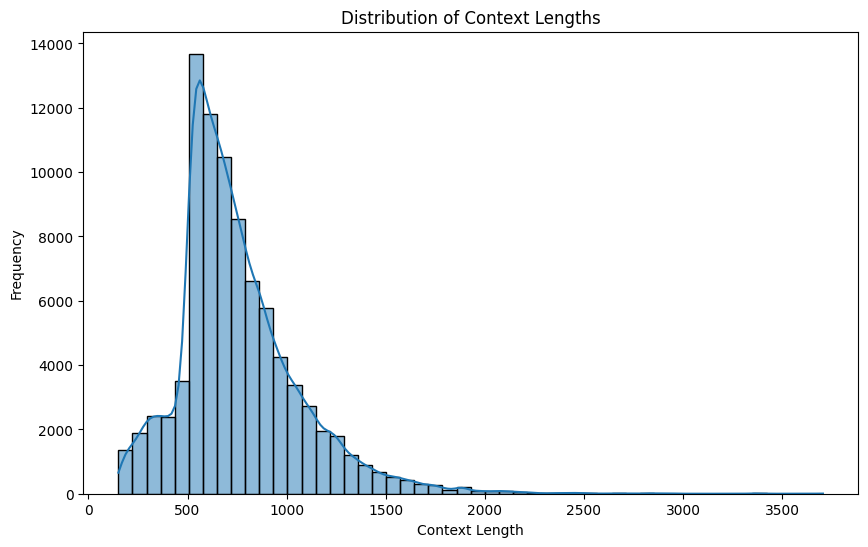

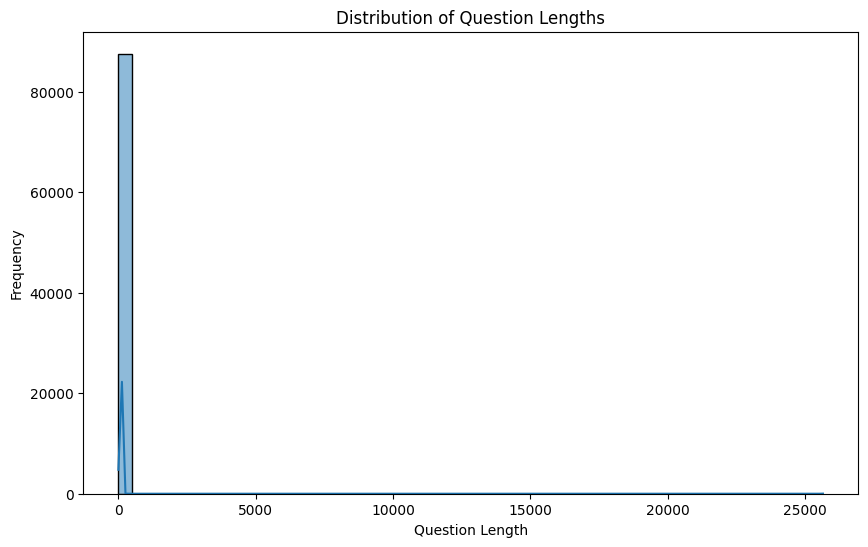

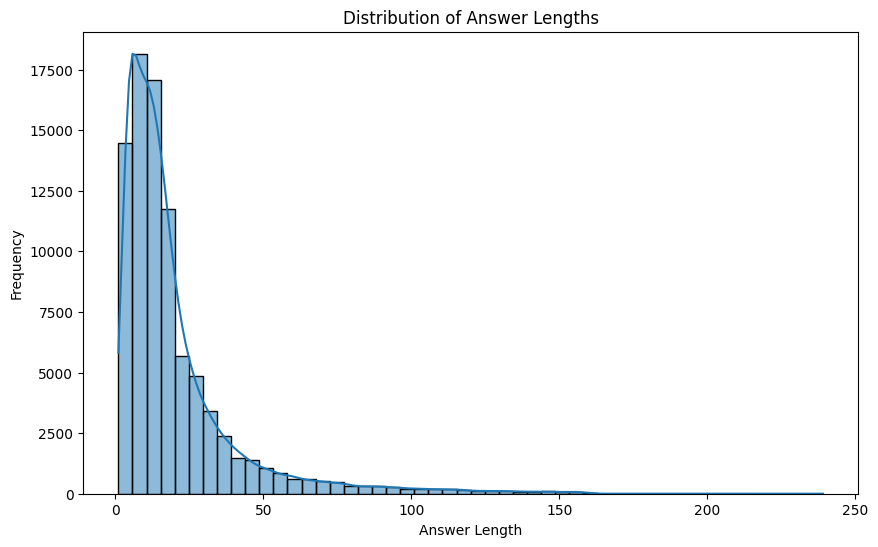

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of context lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['context_length'], bins=50, kde=True)
plt.title('Distribution of Context Lengths')
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()

# Distribution of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['question_length'], bins=50, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

# Distribution of answer lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_length'], bins=50, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()


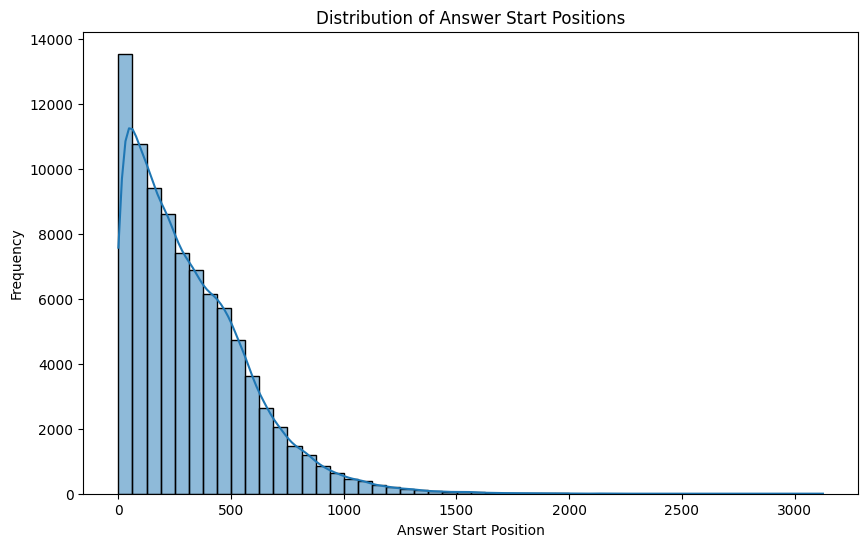

In [4]:
# Extract answer start positions
train_df['answer_start'] = train_df['answers'].apply(lambda x: x['answer_start'][0])

# Distribution of answer start positions
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_start'], bins=50, kde=True)
plt.title('Distribution of Answer Start Positions')
plt.xlabel('Answer Start Position')
plt.ylabel('Frequency')
plt.show()


In [5]:
# Number of unique contexts and questions
unique_contexts = train_df['context'].nunique()
unique_questions = train_df['question'].nunique()

print(f'Number of unique contexts: {unique_contexts}')
print(f'Number of unique questions: {unique_questions}')


Number of unique contexts: 18891
Number of unique questions: 87355


In [7]:
# Number of unique contexts and questions
unique_contexts = train_df['context'].nunique()
unique_questions = train_df['question'].nunique()

print(f'Number of unique contexts: {unique_contexts}')
print(f'Number of unique questions: {unique_questions}')


Number of unique contexts: 18891
Number of unique questions: 87355


In [8]:
# Extract unique answers
unique_answers = train_df['answers'].apply(lambda x: x['text'][0]).nunique()

print(f'Number of unique answers: {unique_answers}')


Number of unique answers: 65134


In [9]:
from scipy.stats import zscore

# Calculate Z-scores
train_df['context_zscore'] = zscore(train_df['context_length'])
train_df['question_zscore'] = zscore(train_df['question_length'])
train_df['answer_zscore'] = zscore(train_df['answer_length'])

# Identify outliers (Z-score > 3 or < -3)
context_outliers = train_df[abs(train_df['context_zscore']) > 3]
question_outliers = train_df[abs(train_df['question_zscore']) > 3]
answer_outliers = train_df[abs(train_df['answer_zscore']) > 3]

print("Context outliers:\n", context_outliers[['context', 'context_length', 'context_zscore']])
print("Question outliers:\n", question_outliers[['question', 'question_length', 'question_zscore']])
print("Answer outliers:\n", answer_outliers[['answers', 'answer_length', 'answer_zscore']])


Context outliers:
                                                  context  context_length  \
148    Since the construction of its oldest buildings...            1786   
149    Since the construction of its oldest buildings...            1786   
150    Since the construction of its oldest buildings...            1786   
151    Since the construction of its oldest buildings...            1786   
152    Since the construction of its oldest buildings...            1786   
...                                                  ...             ...   
87202  There is a very active tradition of hunting of...            2824   
87203  There is a very active tradition of hunting of...            2824   
87204  There is a very active tradition of hunting of...            2824   
87205  There is a very active tradition of hunting of...            2824   
87206  There is a very active tradition of hunting of...            2824   

       context_zscore  
148          3.356064  
149          3.35606

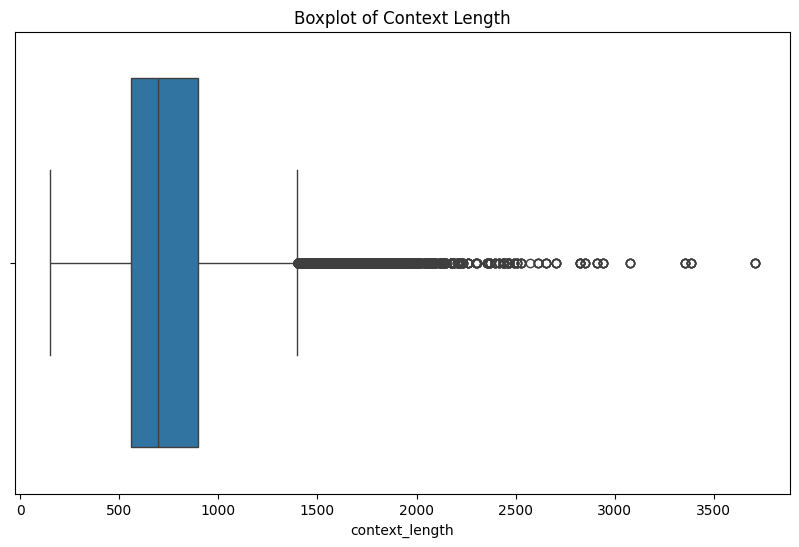

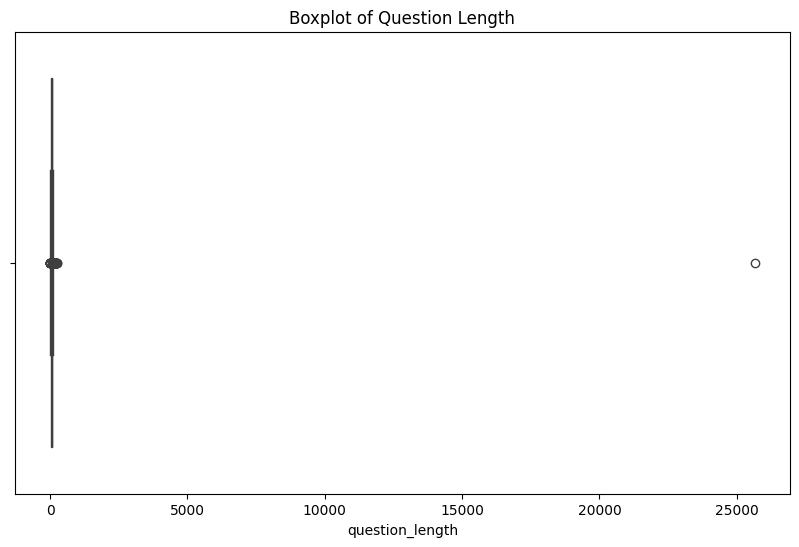

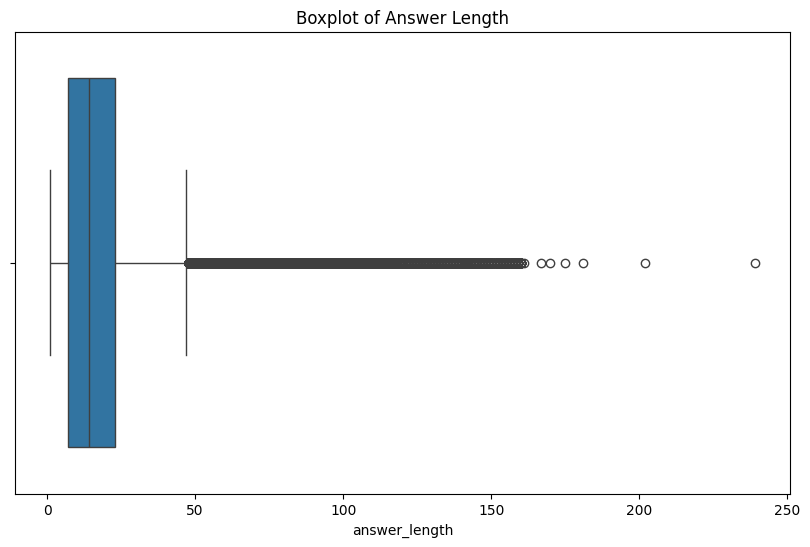

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for context length
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['context_length'])
plt.title('Boxplot of Context Length')
plt.show()

# Boxplot for question length
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['question_length'])
plt.title('Boxplot of Question Length')
plt.show()

# Boxplot for answer length
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['answer_length'])
plt.title('Boxplot of Answer Length')
plt.show()
